In [1]:
import sys
sys.path.insert(0, '../lib')
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

In [2]:
video_path = '../../resources/9-6 Drill Jason/2.mp4'
# video_path = '../../resources/UCSD-Nat/8.mp4'

video = cv2.VideoCapture(video_path)

fc = video.get(cv2.CAP_PROP_FRAME_COUNT)

../lib/median.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  stacked_flattened = numpy.vstack((frame.ravel() for frame in buffer))


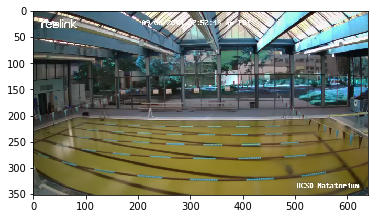

In [3]:
buffer = []
count = 0
while video.isOpened():
    count+=1
    ret_val, frame = video.read()
    if (not ret_val) or (cv2.waitKey(1)==27) or count > 200:
        break
    if count > 100 and count < 200:
        buffer.append(frame)
    
import median
m = median.Median()
mi = m.get_median(buffer)

#mi = cv2.cvtColor(mi, cv2.COLOR_BGR2RGB)
plt.imshow(mi)
plt.show()

In [4]:
mi.shape

(352, 640, 3)

In [5]:
# light_blue = (80, 80, 50)
# dark_blue = (110, 255, 255)
# hsv = cv2.cvtColor(mi, cv2.COLOR_BGR2HSV)
# mask = cv2.inRange(hsv, light_blue, dark_blue)
# result = cv2.bitwise_and(mi, mi, mask=mask)
# mask2 = cv2.medianBlur(mask, 45)

# from skimage.morphology import convex_hull_image
# mask3 = 255*(convex_hull_image(mask)).astype('uint8')

# p = cv2.bitwise_and(mi, mi, mask=mask)

In [6]:
mask = cv2.imread('./ucsd_pool_mask.png')
mask = mask[:,:,0]

In [7]:
# mask = cv2.resize(mask, (1920, 1072), interpolation = cv2.INTER_AREA)

In [8]:
mask.shape
imh = mi.shape[0]
imw = mi.shape[1]

In [9]:
# timebuffer = np.float32(buffer[0:250]).reshape(len(buffer[0:250]), imh*imw, 3)
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# timeclusters = cv2.kmeans(timebuffer, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)[2]
# timeclusters = np.array([np.uint8(timecenter.reshape(imh, imw, 3)) for timecenter in timeclusters])

In [10]:
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# verticalclusters = np.array([
#     [
#         cv2.kmeans(np.float32(mi[max(0, i-4):min(i+5, mi.shape[0]),j,:]), 5, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)[2]
#         for j in range(mi.shape[1])]
#     for i in range(mi.shape[0])
# ])
# s = verticalclusters.shape
# verticalclusters = np.uint8([verticalclusters[:, :, i, :].reshape(s[0], s[1], s[3]) for i in range(s[2])])

In [11]:
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# h = 4
# w = 1
# boxclusters = np.array([
#     [
#         cv2.kmeans(np.float32(mi[max(0, i-h):min(i+h+1, mi.shape[0]),max(0, j-w):min(j+w+1, mi.shape[1]),:])
#                    .reshape((min(i+h+1, mi.shape[0])-max(0, i-h))*(min(j+w+1, mi.shape[1])-max(0, j-w)),3), 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)[2]
#         for j in range(mi.shape[1])]
#     for i in range(mi.shape[0])
# ])
# s = boxclusters.shape
# boxclusters = np.uint8([boxclusters[:, :, i, :].reshape(s[0], s[1], s[3]) for i in range(s[2])])

In [12]:
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# h = 0
# w = 0
# timeboxbuffer = np.float32(buffer)
# timeboxclusters = np.array([
#     [
#         cv2.kmeans(timeboxbuffer[:,max(0, i-h):min(i+h+1, timeboxbuffer.shape[1]),max(0, j-w):min(j+w+1, timeboxbuffer.shape[2]),:].reshape(timeboxbuffer.shape[0]*(min(i+h+1, timeboxbuffer.shape[1])-max(0, i-h))*(min(j+w+1, timeboxbuffer.shape[2])-max(0, j-w)),3), 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)[2]
#         for j in range(timeboxbuffer.shape[2])]
#     for i in range(timeboxbuffer.shape[1])
# ])
# s = timeboxclusters.shape
# timeboxclusters = np.uint8([timeboxclusters[:, :, i, :].reshape(s[0], s[1], s[3]) for i in range(s[2])])

In [13]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
h = 11
w = 4
blockclusters = np.array([
    [
        cv2.kmeans(np.float32(mi[h*i:h*(i+1),w*j:w*(j+1),:]).reshape(w*h,3), 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)[2]
        for j in range(int(mi.shape[1]/w))]
    for i in range(int(mi.shape[0]/h))
])
s = blockclusters.shape
blockclusters = [blockclusters[:, :, i, :].reshape(s[0], s[1], s[3]) for i in range(s[2])]
blockclusters = np.uint8([cv2.resize(blockcluster, dsize=(imw, imh), interpolation=cv2.INTER_NEAREST) for blockcluster in blockclusters])

In [14]:
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# h = 44
# w = 16
# timeblockbuffer = np.float32(buffer)
# timeblockclusters = np.array([
#     [
#         cv2.kmeans(timeblockbuffer[:,h*i:h*(i+1),w*j:w*(j+1),:].reshape(timeblockbuffer.shape[0]*w*h,3), 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)[2]
#         for j in range(int(mi.shape[1]/w))]
#     for i in range(int(mi.shape[0]/h))
# ])
# s = timeblockclusters.shape
# timeblockclusters = [timeblockclusters[:, :, i, :].reshape(s[0], s[1], s[3]) for i in range(s[2])]
# timeblockclusters = np.uint8([cv2.resize(timeblockcluster, dsize=(1920, 1072), interpolation=cv2.INTER_NEAREST) for timeblockcluster in timeblockclusters])

In [15]:
video.open(video_path)
video.set(cv2.CAP_PROP_POS_FRAMES, 50)

import time
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
# out = cv2.VideoWriter('./out/detectedImage'+str(int(time.time()))+'.avi', fourcc, video.get(cv2.CAP_PROP_FPS), (imw, imh))

from skimage import filters
import blobParams
b = blobParams.BlobParams()
import centroidTracker
ct = centroidTracker.CentroidTracker()
frame_count = 0
# swimmers = {}
while video.isOpened():
    frame_count += 1
    print(frame_count)
    ret_val, frame = video.read()
    if (not ret_val) or (cv2.waitKey(1)==27):
        break
    masked_frame = cv2.bitwise_and(frame, frame, mask=mask)
    d1 = [cv2.cvtColor(cv2.absdiff(masked_frame, cv2.bitwise_and(bg, bg, mask=mask)), cv2.COLOR_BGR2GRAY) for bg in blockclusters]
#     d2 = [cv2.cvtColor(cv2.absdiff(masked_frame, cv2.bitwise_and(bg, bg, mask=mask)), cv2.COLOR_BGR2GRAY) for bg in blockclusters]
#     d3 = [cv2.cvtColor(cv2.absdiff(masked_frame, cv2.bitwise_and(bg, bg, mask=mask)), cv2.COLOR_BGR2GRAY) for bg in boxclusters]
#     d = np.concatenate([d1, d2, d3])
    d = np.array(d1).min(axis=0)
    cv2.imshow('d', d)
    fgh = 255*np.uint8(filters.apply_hysteresis_threshold(d, 15, 50))
    cv2.imshow('fgh', fgh)
    fgt = 255*np.uint8(filters.threshold_local(d, 25, offset=20))
    cv2.imshow('fgt', fgt)
    detected_blobs = b.get_blob(fgh, 185)
    rects, output = b.get_bounding_rectangles(frame, detected_blobs)
    objects = ct.update(rects)
#     for (objectID, centroid) in objects.items():
#         print(objectID)
#         if objectID in swimmers.keys():
#             swimmers[objectID].centroid = centroid
#         else:
#             swimmers[objectID] = {centroid : centroid}
    b.get_ids(output, objects)
    cv2.imshow('DetectedImage', output)
#     out.write(output)
cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [16]:
video.release()